This notebook shows how to perform a complex calibration using two measurement files

In [1]:
from pyphotomol import (
    MPAnalyzer,
    plot_histogram,
    plot_histograms_and_fits,
    plot_calibration,
    PlotConfig,
    AxisConfig,
    LayoutConfig,
    LegendConfig
)

from scripts import display_figure_static

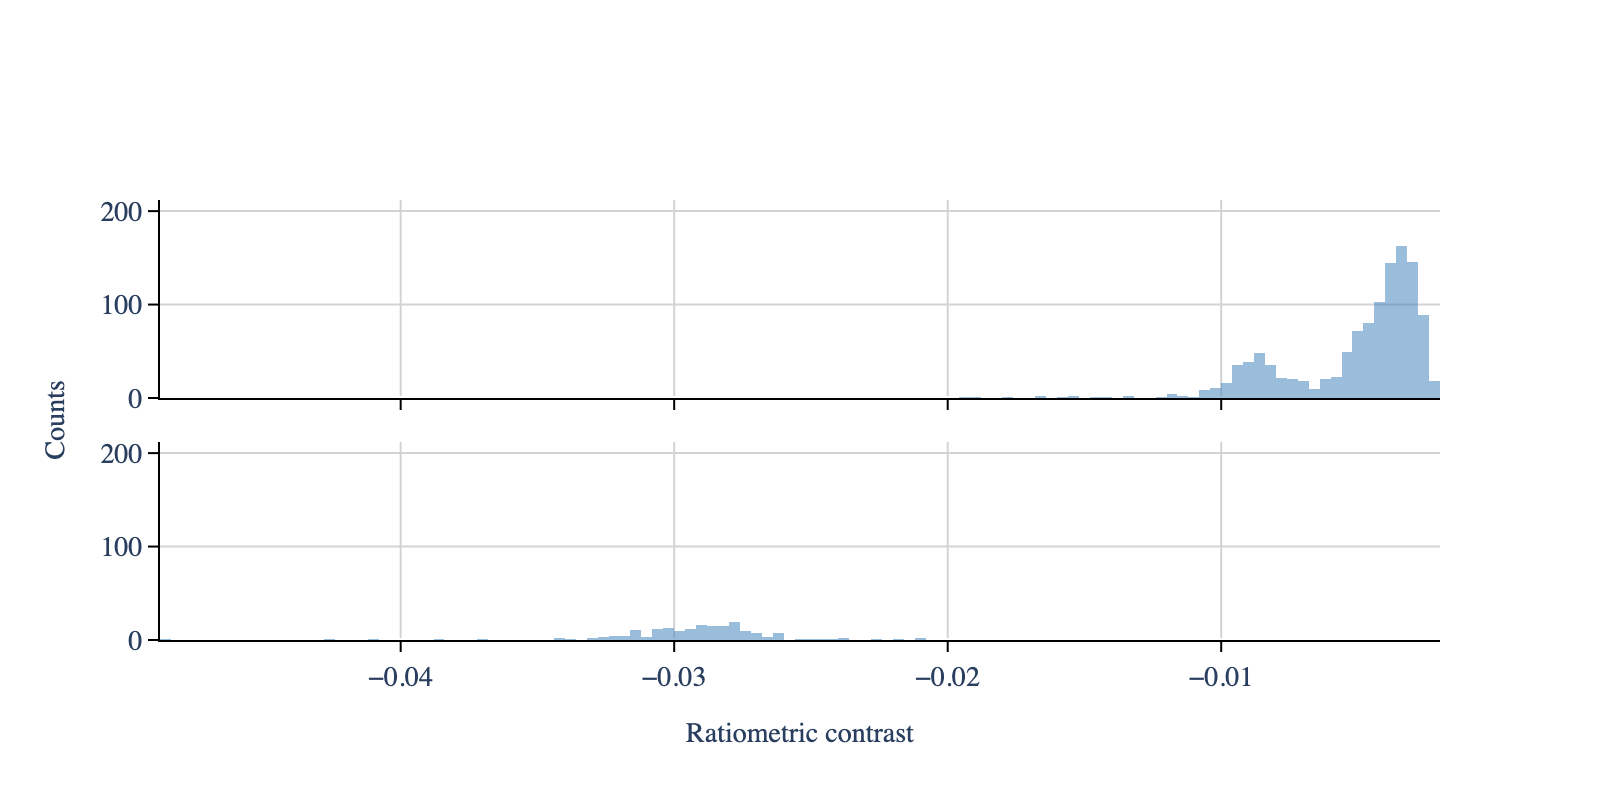

In [2]:
file = '../test_files/contrasts.csv'

files = [file, file]
names = ['file1', 'file2']

mp = MPAnalyzer()
mp.import_files(files, names=names)

# Artificially remove contrasts so we simulate two different files
# Only required here - do not do this in real analysis
mp.models['file2'].contrasts = mp.models['file2'].contrasts[mp.models['file2'].contrasts < -0.02]
mp.models['file1'].contrasts = mp.models['file1'].contrasts[mp.models['file1'].contrasts > -0.02]

# Create the histogram - same window and bin width for all files
mp.apply_to_all('create_histogram', use_masses=False, window=[-0.05, 0], bin_width=0.0004)

# Plot the histogram
# Create configuration objects
plot_config = PlotConfig(contrasts=True)
layout_config = LayoutConfig(
    stacked=True,
    extra_padding_y_label=0.02
)

fig = plot_histogram(mp, 
                     plot_config=plot_config,
                     layout_config=layout_config)
display_figure_static(fig, height=400)

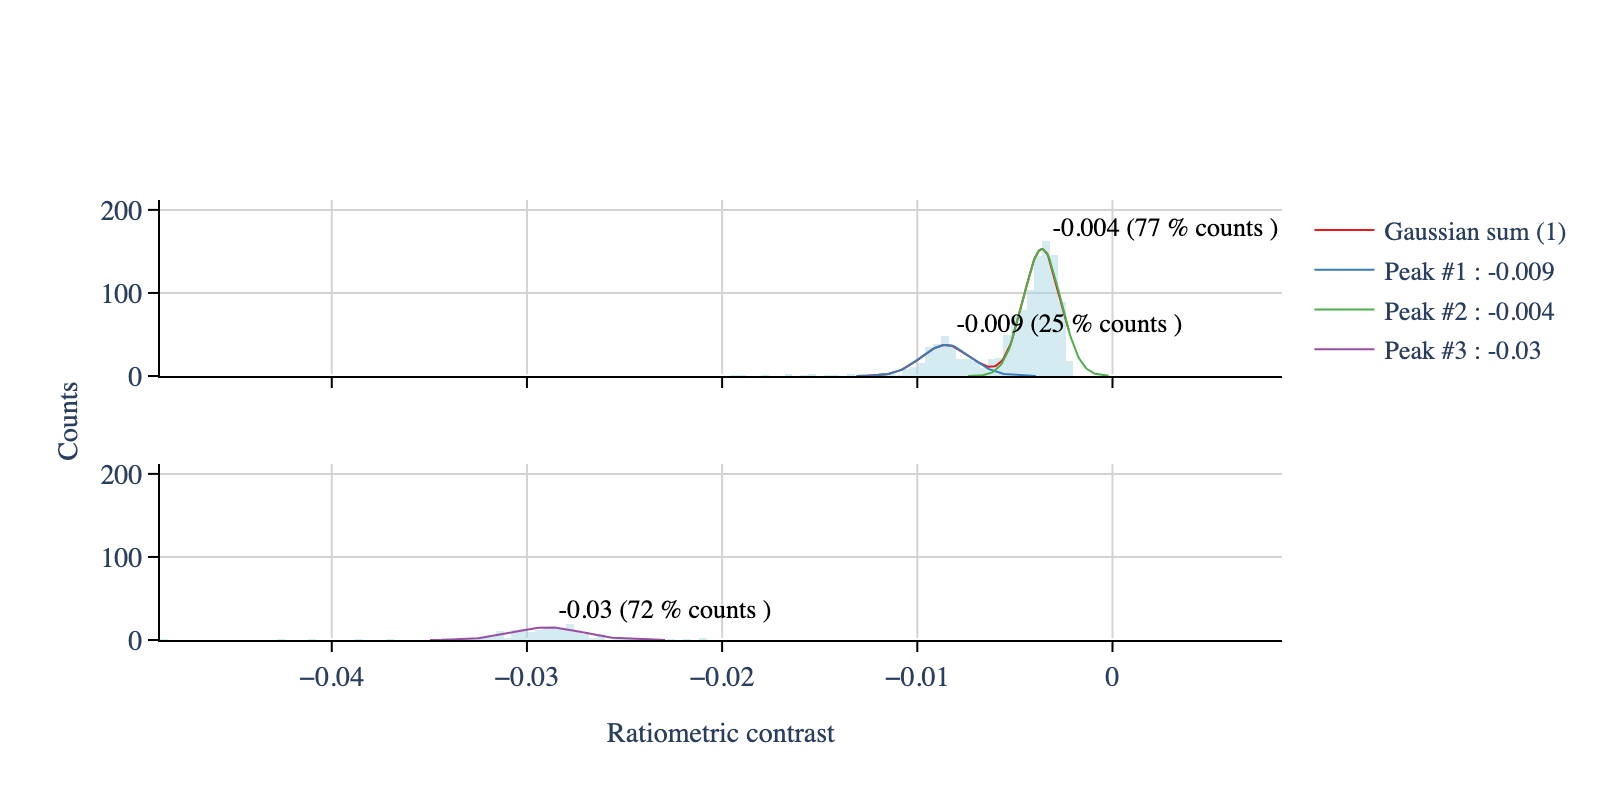

In [3]:
# Fit the first file
mp.models['file1'].fit_histogram(
    peaks_guess=[-0.01, -0.005],
    mean_tolerance=0.1,
    std_tolerance=0.1,
    threshold=-0.0022,
    baseline=0)

# Fit the second file
mp.models['file2'].fit_histogram(
    peaks_guess=[-0.03],
    mean_tolerance=0.1,
    std_tolerance=0.1,
    threshold=-0.0022,
    baseline=0)

legends_df, _ = mp.create_plotting_config(repeat_colors=False)

# Plot the fits
# Create configuration objects
plot_config = PlotConfig(contrasts=True)
layout_config = LayoutConfig(
    stacked=True,
    extra_padding_y_label=0.02,
    vertical_spacing=0.2
)
legend_config = LegendConfig(line_width=1)

fig = plot_histograms_and_fits(
    mp, 
    legends_df=legends_df, 
    colors_hist='lightblue',
    plot_config=plot_config,
    layout_config=layout_config,
    legend_config=legend_config)

display_figure_static(fig, height=400)

Slope: -6.127250474028057e-05, Intercept: 0.000484056933861328


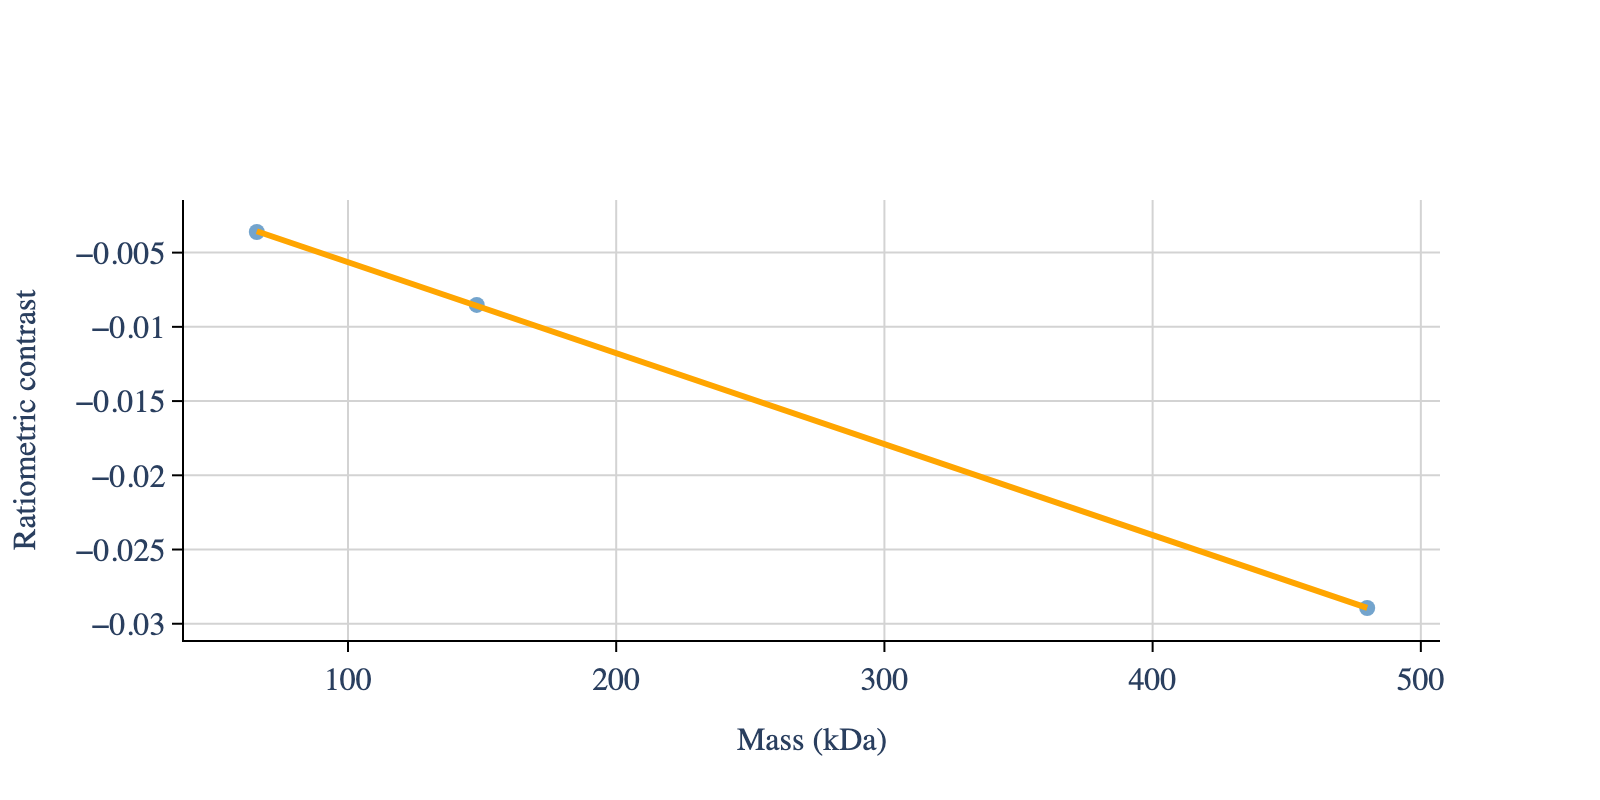

In [4]:
# Apply the master calibration
known_standards_file_1 = [148, 66]  # From the highest mass to the lowest
known_standards_file_2 = [480] 

known_standards_both = known_standards_file_1 + known_standards_file_2

mp.master_calibration(
    calibration_standards=known_standards_both)

# Print the calibration results
calibration_dic = mp.calibration_dic

slope = calibration_dic['fit_params'][0]
intercept = calibration_dic['fit_params'][1]

print(f'Slope: {slope}, Intercept: {intercept}')

# Plot the calibration
# Create configuration objects
plot_config = PlotConfig(font_size=16)
axis_config = AxisConfig(n_y_axis_ticks=6)  # Guideline, not a strict rule

fig = plot_calibration(
    mass=known_standards_both,
    contrast=calibration_dic['exp_points'],
    slope=slope,
    intercept=intercept,
    plot_config=plot_config,
    axis_config=axis_config)

display_figure_static(fig, height=400)